<h1> Import Libraries </h1>

In [18]:
#Imoprt Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nbimporter
from Fit import GradientDescent

<h1> Make Dataframe</h1>

In [19]:
#Make dataframe
cars = pd.read_csv("/Users/grantpoulsen/Desktop/Car details v3.csv")
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


<h1> Clean and Normalize Data for Algorithm </h1>

In [20]:
#Do a quick clean on what we need & Normalize data for algorithm
cars['km_driven'] = cars['km_driven'] * 0.621371 / 10000
cars['selling_price'] = cars['selling_price'] / 100000
cars['year'] = cars['year'] /100
cars.rename(columns={'km_driven': 'miles_driven'}, inplace=True)

<h1> Consider the Inner Quartile for Corolla </h1>

In [21]:
#Lets get the meat of the data & use a common car model
q2 = cars['selling_price'].describe()['25%']
q3 = cars['selling_price'].describe()['75%']

cars = cars[(cars['selling_price'] <= q3) & (cars['selling_price'] >= q2)]
cars = cars[cars['name'].str.contains('Corolla')]

<h1> Plot Price vs Miles </h1>

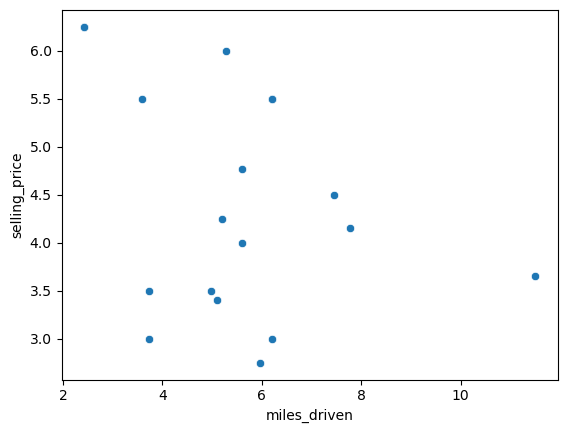

In [22]:
#Linear Negative Relationship Here
sns.scatterplot(data = cars, x = 'miles_driven', y = 'selling_price')
plt.show()

<h1> Plot Price vs Year </h1>

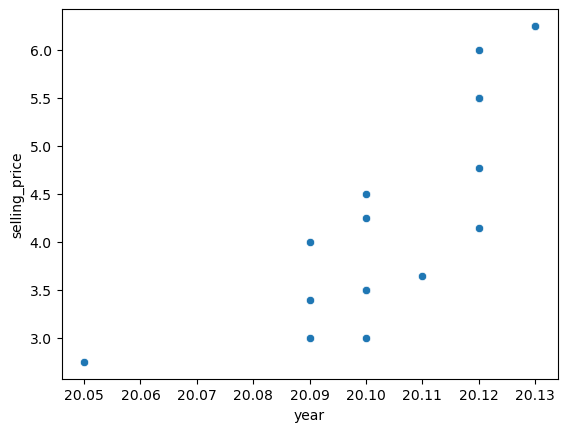

In [23]:
#Linear Positive Relationship Here
sns.scatterplot(data = cars, x = 'year', y = 'selling_price')
plt.show()

<h1> Compute Model and Gradient </h1>

In [24]:
def model(parameters, inputs):
    
    return parameters[0] * inputs[0] + parameters[1] * inputs[1] + parameters[2]


In [25]:
def gradient(weights,data):

    gradient = np.array([0,0,0])

    gradient[0] = 2*(weights[0] * data[0] + weights[1] * data[1] + weights[2] - data[2]) * (data[0])
    gradient[1] = 2*(weights[0] * data[0] + weights[1] * data[1] + weights[2] - data[2]) * (data[1])
    gradient[2] = 2*(weights[0] * data[0] + weights[1] * data[1] + weights[2] - data[2])

    return gradient

<h1> Use Gradient Descent & Unormalize </h1>

In [26]:
data = cars[['selling_price','miles_driven','year']]
data = data.to_numpy().astype('long')

parameterGuess = np.array([-.5,-.5,0])

parameterTrue = GradientDescent(gradient,data,parameterGuess,.001,10000)

parameterTrue[0] = parameterTrue[0] * 10000 
parameterTrue[1] = parameterTrue[1] * 100000
parameterTrue[2] = parameterTrue[2] * 100

print(parameterTrue)

Converged on iteration: 3842
[ 2236.93785158 10019.33061765  1852.96536411]


<h1> Compute R Squared </h1>

In [12]:
predicted = np.array([])

for i in range(len(data)):
    
    predicted = np.append(predicted,model(parameterTrue,data[i]))

data = cars[['selling_price','miles_driven','year']]
data = data['selling_price'].values
correlation_matrix = np.corrcoef(data, predicted)
correlation = correlation_matrix[0,1]
r_squared = correlation**2
print(r_squared)

0.025248213967925228
